In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, f1_score, precision_recall_fscore_support
# from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.linear_model import LassoCV
# from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor, StackingClassifier
from sklearn.linear_model import RidgeCV
import time
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay
# from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
# from sklearn.impute import IterativeImputer
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import pickle
from sklearn.preprocessing import LabelBinarizer


In [76]:
X_train = pd.read_csv('xtrain4.csv')
X_test = pd.read_csv('xtest4.csv')
y_train = pd.read_csv('ytrain4.csv')
y_test = pd.read_csv('ytest4.csv')

In [77]:
y_train=y_train['Range']
y_test =y_test['Range']

In [78]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train,y_test])


In [79]:
print(X['Average_y'].isnull().sum())

42


In [80]:
X.to_csv("X.csv")
y.to_csv("y.csv")

In [81]:
X_test = X_test[['consistency','following','review','Attendance_x',"Middle_termExam",'Subject','Compulsory_x',"Average_y","MatriculationScore","Age","Gender","HighschoolGPA",'Submit']]
X_train = X_train[['consistency','following','review','Attendance_x',"Middle_termExam",'Subject','Compulsory_x',"Average_y","MatriculationScore","Age","Gender","HighschoolGPA",'Submit']]
y_test = y_test
y_train = y_train

In [82]:
def all_spec_of_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    f1_macro = precision_recall_fscore_support(y_test,y_pred, average='macro')
    
    f1_micro = precision_recall_fscore_support(y_test,y_pred, average='micro')
    f1_weighted = precision_recall_fscore_support(y_test,y_pred, average='weighted')
    acc = accuracy_score(y_test,y_pred)
    print("_______Macro_______")
    print('P: {0:0.4f}'.format(f1_macro[0]),' R: {0:0.4f}'.format(f1_macro[1]),' F1: {0:0.4f}'.format(f1_macro[2]))
 
    print("______accuracy_____  {0:0.4f}".format(acc))
    

### Stacking

In [74]:
model = pickle.load(open('stacking_t3.sav','rb'))

In [83]:

all_spec_of_model(model, X_test, y_test)

_______Macro_______
P: 0.7916  R: 0.8254  F1: 0.8041
______accuracy_____  0.8235


### SVC

In [92]:
svc =  pickle.load(open('svc3.sav','rb'))
all_spec_of_model(svc, X_test, y_test)

_______Macro_______
P: 0.8050  R: 0.7651  F1: 0.7829
______accuracy_____  0.8039


### RFC

In [93]:
rfc =  pickle.load(open('rfc3.sav','rb'))
all_spec_of_model(rfc, X_test, y_test)

_______Macro_______
P: 0.7904  R: 0.7413  F1: 0.7623
______accuracy_____  0.7843


### LR

In [95]:
lr=  pickle.load(open('lr3.sav','rb'))
all_spec_of_model(lr, X_test, y_test)

_______Macro_______
P: 0.7965  R: 0.7048  F1: 0.7391
______accuracy_____  0.7843


### KNN

In [102]:
knn =  pickle.load(open('knn3.sav','rb'))
all_spec_of_model(knn, X_test, y_test)

_______Macro_______
P: 0.7704  R: 0.5127  F1: 0.5362
______accuracy_____  0.6667


### GB

In [103]:
gb =  pickle.load(open('gb3.sav','rb'))
all_spec_of_model(gb, X_test, y_test)

_______Macro_______
P: 0.7406  R: 0.6587  F1: 0.6845
______accuracy_____  0.7451


### Drop Attendance

In [96]:
X_test2= X_test.drop('Attendance_x', axis=1)
att =  pickle.load(open('dropatt2.sav','rb'))
all_spec_of_model(att, X_test2, y_test)

_______Macro_______
P: 0.7529  R: 0.7302  F1: 0.7403
______accuracy_____  0.7843


### Drop Midterm

In [104]:
X_test2= X_test.drop('Middle_termExam', axis=1)
mid =  pickle.load(open('dropmid2.sav','rb'))
all_spec_of_model(mid, X_test, y_test)

_______Macro_______
P: 0.7678  R: 0.6206  F1: 0.6578
______accuracy_____  0.7647


### Drop Prev

In [98]:
X_test2= X_test.drop('Average_y', axis=1)
prev =  pickle.load(open('dropprev2.sav','rb'))
all_spec_of_model(prev, X_test, y_test)

_______Macro_______
P: 0.7054  R: 0.6111  F1: 0.6318
______accuracy_____  0.7255


### Drop Compulsory

In [110]:
X_test2= X_test.drop('Average_y', axis=1)
com =  pickle.load(open('dropcomp2.sav','rb'))
all_spec_of_model(com, X_test, y_test)

_______Macro_______
P: 0.7778  R: 0.7778  F1: 0.7778
______accuracy_____  0.8039


### Drop Gender

In [111]:
X_test2= X_test.drop('Gender', axis=1)
gen =  pickle.load(open('dropgen2.sav','rb'))
all_spec_of_model(gen, X_test, y_test)

_______Macro_______
P: 0.7997  R: 0.7889  F1: 0.7939
______accuracy_____  0.8235


In [87]:
y

0     B
1     C
2     B
3     B
4     B
     ..
46    B
47    B
48    B
49    B
50    A
Name: Range, Length: 253, dtype: object

In [112]:
import seaborn as sns
o = pd.DataFrame({'Range':y.values})
# sns.countplot(data = o, x="class")

C:\Users\Admin\AppData\Local\Temp\ipykernel_35764\3517445613.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(o,x='Range', palette=["aqua", "darkorange", "cornflowerblue","lightgreen"],


[Text(0, 0, '3')]

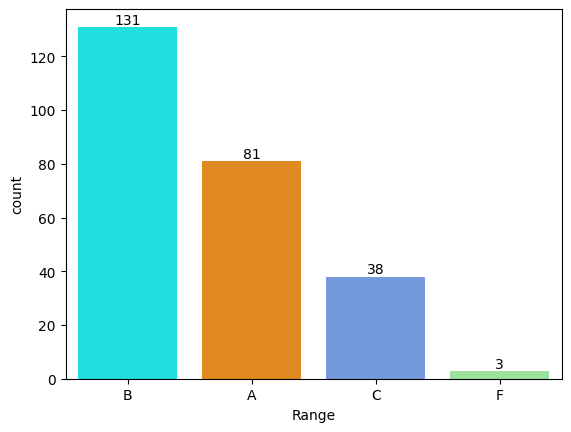

In [121]:
ax =sns.countplot(o,x='Range', palette=["aqua", "darkorange", "cornflowerblue","lightgreen"],
                  order=o['Range'].value_counts(ascending=False).index)
# abs_values = o['Range'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.bar_label(container=ax.containers[2])
ax.bar_label(container=ax.containers[3])

In [46]:
X['Range']=y

In [47]:
X['following'].value_counts()

0.000000    2
0.363315    2
0.211528    1
0.302879    1
0.204232    1
           ..
0.011008    1
0.317868    1
0.181123    1
0.225268    1
0.357902    1
Name: following, Length: 251, dtype: int64

In [128]:
df = pd.read_excel('bochium.xlsx')
X=df[['consistency','following','review','Attendance_x',"Middle_termExam",'Compulsory_x',"Average_y","MatriculationScore","Age","Gender","HighschoolGPA",'Submit','Range']]

In [129]:
newX= X

In [130]:
newX['Consistency'] = X['consistency']
newX['Following'] = X['following']
newX['Attendance'] = X['Attendance_x']
newX['Midterm Exam'] = X['Middle_termExam']
newX['Previous GPA'] = X['Average_y']
newX['Entrance Exam'] = X['MatriculationScore']
newX['Compulsory'] = X['Compulsory_x']
newX['Review'] = X['review']



C:\Users\Admin\AppData\Local\Temp\ipykernel_35764\3290254838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newX['Consistency'] = X['consistency']
C:\Users\Admin\AppData\Local\Temp\ipykernel_35764\3290254838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newX['Following'] = X['following']
C:\Users\Admin\AppData\Local\Temp\ipykernel_35764\3290254838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [133]:
X= newX[['Consistency','Following','Review','Attendance',"Midterm Exam",'Compulsory',"Previous GPA","Entrance Exam","Age","Gender","HighschoolGPA",'Submit','Range']]
X['Range'] = X['Range'].map({'F':0,'C':2,'B':3,'A':4})
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Admin\AppData\Local\Temp\ipykernel_35764\2918506354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Range'] = X['Range'].map({'F':0,'C':2,'B':3,'A':4})


,Consistency,Following,Review,Attendance,Midterm Exam,Compulsory,Previous GPA,Entrance Exam,Age,Gender,HighschoolGPA,Submit,Range
Consistency,1.000000,0.442597,0.090785,0.403221,0.063075,-0.247202,0.159366,0.123965,0.055055,-0.149973,0.083622,0.266001,0.176271
Following,0.442597,1.000000,-0.043228,0.433961,0.050904,-0.238559,0.129401,0.202633,0.047252,-0.174759,0.306023,0.223350,0.171483
Review,0.090785,-0.043228,1.000000,0.130341,0.111503,0.475503,0.137679,-0.187704,-0.272035,-0.099419,0.113643,0.351537,0.207421
Attendance,0.403221,0.433961,0.130341,1.000000,0.347188,-0.119813,0.408868,0.203212,0.007752,-0.172224,0.365506,0.348145,0.407120
Midterm Exam,0.063075,0.050904,0.111503,0.347188,1.000000,0.120784,0.550216,-0.050810,-0.172505,-0.128806,0.412848,0.144880,0.628544
Compulsory,-0.247202,-0.238559,0.475503,-0.119813,0.120784,1.000000,-0.078353,-0.508443,-0.444687,-0.034991,-0.021782,-0.077638,0.026153
Previous GPA,0.159366,0.129401,0.137679,0.408868,0.550216,-0.078353,1.000000,0.123907,-0.092389,0.016563,0.319076,0.250032,0.713255
Entrance Exam,0.123965,0.202633,-0.187704,0.203212,-0.050810,-0.508443,0.123907,1.000000,nan,0.139180,0.054551,0.110399,0.173322
Age,0.055055,0.047252,-0.272035,0.007752,-0.172505,-0.444687,-0.092389,nan,1.000000,-0.091029,nan,0.122785,-0.199348
Gender,-0.149973,-0.174759,-0.099419,-0.172224,-0.128806,-0.034991,0.016563,0.139180,-0.091029,1.000000,-0.404964,-0.141015,-0.057974


<AxesSubplot: >

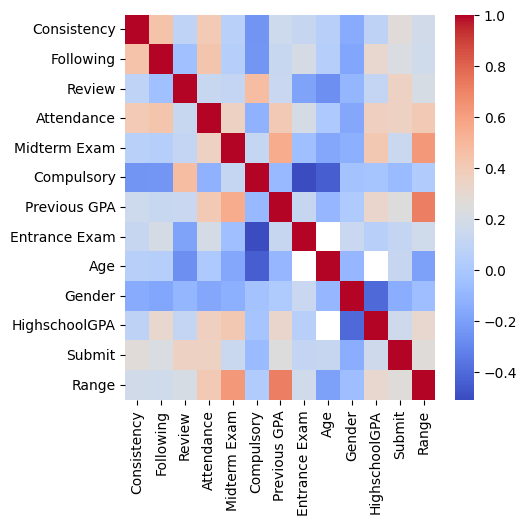

In [134]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap='coolwarm')

### Confusion matrix

In [135]:
X_test = X_test[['consistency','following','review','Attendance_x',"Middle_termExam",'Subject','Compulsory_x',"Average_y","MatriculationScore","Age","Gender","HighschoolGPA",'Submit']]
X_train = X_train[['consistency','following','review','Attendance_x',"Middle_termExam",'Subject','Compulsory_x',"Average_y","MatriculationScore","Age","Gender","HighschoolGPA",'Submit']]

In [68]:
y_test = y_test['Range']

Confusion matrix, without normalization
[[11  3  0]
 [ 2 25  3]
 [ 0  1  6]]
Normalized confusion matrix
[[0.78571429 0.21428571 0.        ]
 [0.06666667 0.83333333 0.1       ]
 [0.         0.14285714 0.85714286]]


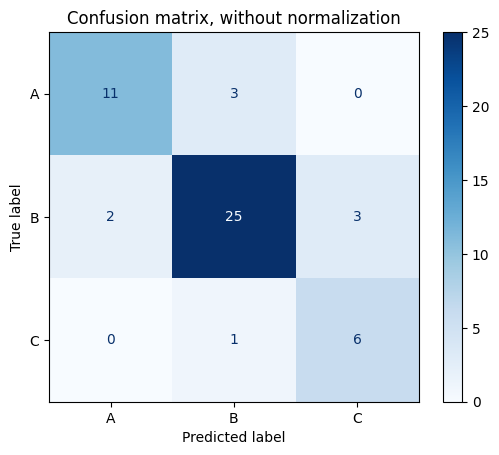

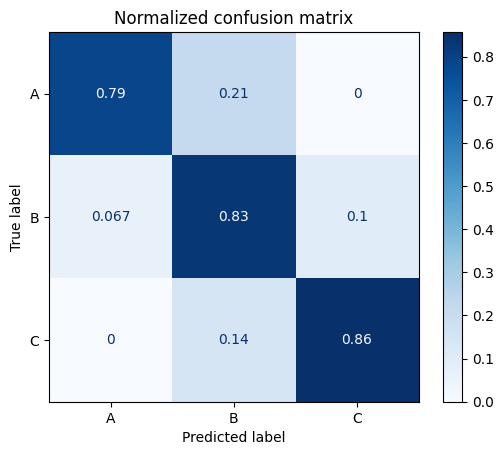

In [136]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [71]:
y_train = y_train['Range']

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


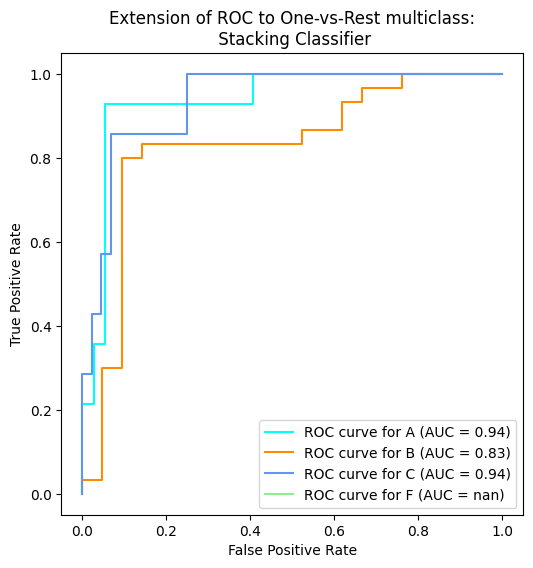

In [137]:
y_pred= model.predict_proba(X_test)
n_classes = len(np.unique(y))
target_names =['A',"B","C","F"]
fig, ax = plt.subplots(figsize=(6, 6))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

colors = ["aqua", "darkorange", "cornflowerblue","lightgreen"]
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
    
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        # plot_chance_level=(class_id == 2),
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of ROC to One-vs-Rest multiclass:\n Stacking Classifier")
plt.legend()
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


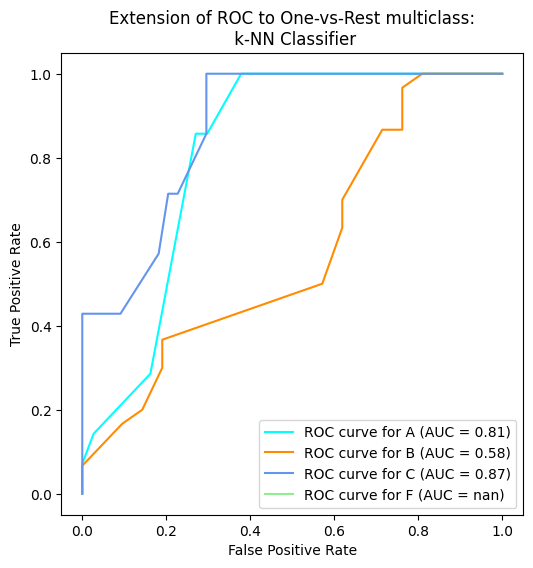

In [142]:
knn.fit(X_train,y_train)
y_pred= knn.predict_proba(X_test)
n_classes = len(np.unique(y_train))
target_names =['A',"B","C","F"]
fig, ax = plt.subplots(figsize=(6, 6))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
colors = ["aqua", "darkorange", "cornflowerblue","lightgreen"]
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        
       
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of ROC to One-vs-Rest multiclass:\n k-NN Classifier")
plt.legend()
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


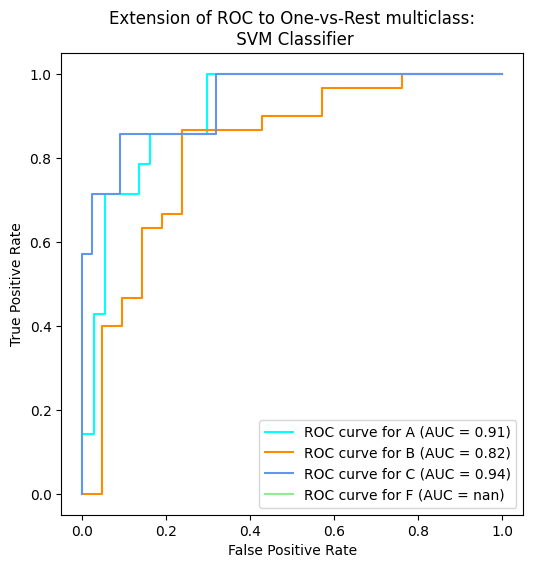

In [138]:
#calculate scores of SVM
svc.fit(X_train,y_train)
y_pred= svc.predict_proba(X_test)

n_classes = len(np.unique(y_train))
target_names =['A',"B","C","F"]
fig, ax = plt.subplots(figsize=(6, 6))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

colors = ["aqua", "darkorange", "cornflowerblue","lightgreen"]
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
 
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of ROC to One-vs-Rest multiclass:\n SVM Classifier")
plt.legend()
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


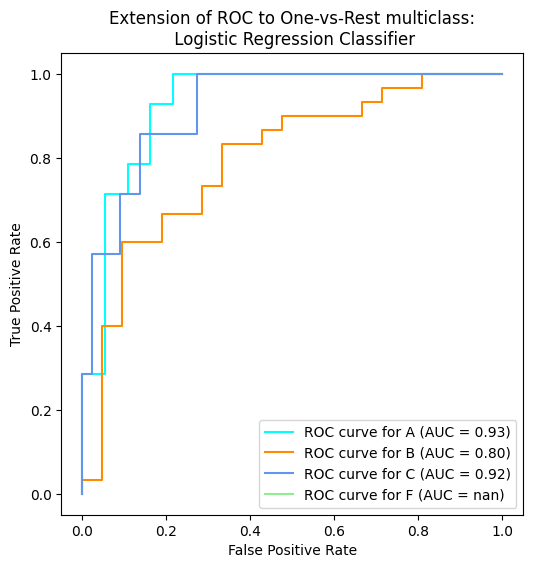

In [141]:
#calculate scores of LR
lr.fit(X_train,y_train)
y_pred= lr.predict_proba(X_test)
n_classes = len(np.unique(y_train))
target_names =['A',"B","C","F"]
fig, ax = plt.subplots(figsize=(6, 6))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

colors = ["aqua", "darkorange", "cornflowerblue","lightgreen"]
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of ROC to One-vs-Rest multiclass:\n Logistic Regression Classifier")
plt.legend()
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


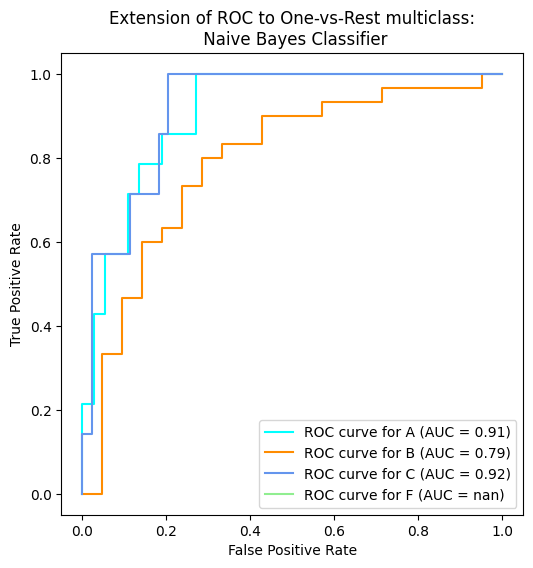

In [139]:
#calculate scores of NB
gb.fit(X_train,y_train)
y_pred= gb.predict_proba(X_test)
n_classes = len(np.unique(y_train))
target_names =['A',"B","C","F"]
fig, ax = plt.subplots(figsize=(6, 6))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

colors = ["aqua", "darkorange", "cornflowerblue","lightgreen"]
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of ROC to One-vs-Rest multiclass:\n Naive Bayes Classifier")
plt.legend()
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


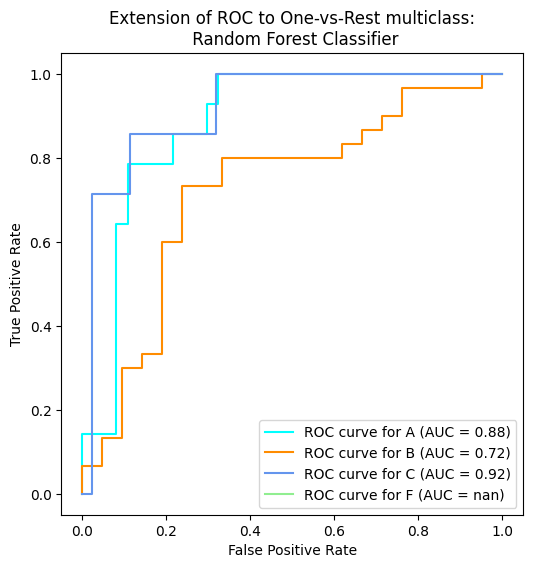

In [140]:
#calculate scores of RF
rfc.fit(X_train,y_train)
y_pred= rfc.predict_proba(X_test)
n_classes = len(np.unique(y_train))
target_names =['A',"B","C","F"]
fig, ax = plt.subplots(figsize=(6, 6))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

colors = ["aqua", "darkorange", "cornflowerblue","lightgreen"]
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of ROC to One-vs-Rest multiclass:\n Random Forest Classifier")
plt.legend()
plt.show()